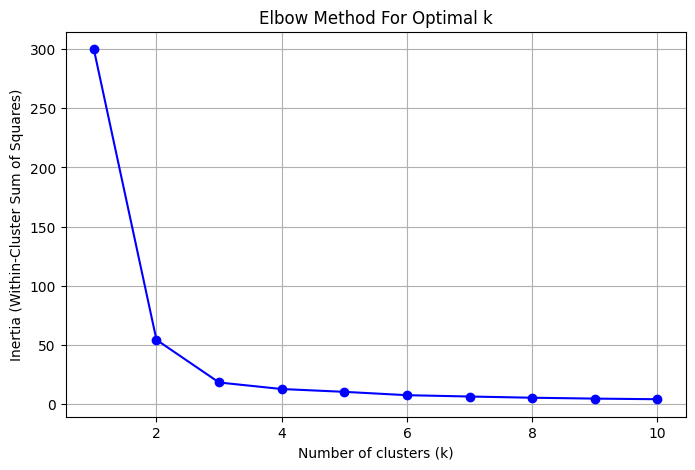

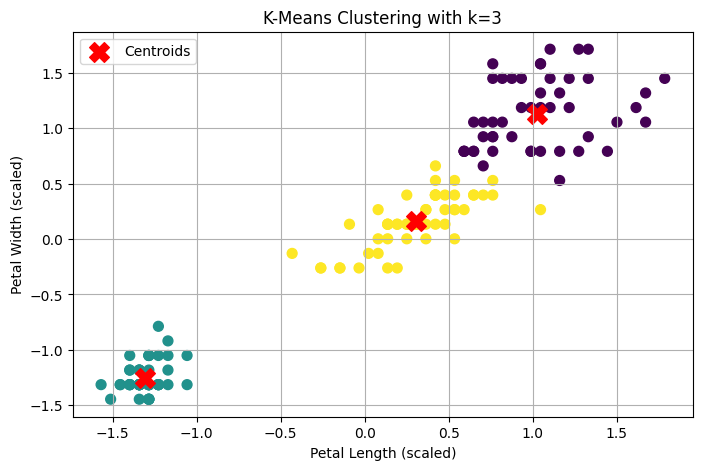

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("/content/iris.csv")

# Step 2: Select only petal length and width features
X = df[['petal_length', 'petal_width']]

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 5: Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 6: Build final model with optimal k (visually identify from elbow plot)
# You can replace 3 with the optimal k you see from the elbow plot
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_final.fit_predict(X_scaled)

# Step 7: Add cluster labels to original data
df['Cluster'] = labels

# Step 8: Plot the clustered data
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()
